# **BUSINESS CASE : Jamboree Education - Linear Regression**


# **ABOUT**
### **Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.**
### **They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.**

# **How can I help here?**

### **Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.**

### **Importing Important Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

### **Downloading the dataset**

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv

--2023-12-06 17:04:38--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.164.173.110, 18.164.173.117, 18.164.173.18, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.164.173.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16176 (16K) [text/plain]
Saving to: ‘Jamboree_Admission.csv.2’

Jamboree_Admission. 100%[===================>]  15.80K  --.-KB/s    in 0s      

2023-12-06 17:04:38 (145 MB/s) - ‘Jamboree_Admission.csv.2’ saved [16176/16176]



### **Reading the Dataset**

In [ ]:
df=pd.read_csv("Jamboree_Admission.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


### **Shape of the dataset**

In [ ]:
df.shape

(500, 9)

# **Column Profiling:**

 - Serial No. (Unique row ID)
 - GRE Scores (out of 340)
 - TOEFL Scores (out of 120)
 - University Rating (out of 5)
 - Statement of Purpose and Letter of Recommendation Strength (out of 5)
 - Undergraduate GPA (out of 10)
 - Research Experience (either 0 or 1)
 - Chance of Admit (ranging from 0 to 1)

In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


 - Chances of admit is a probability measure , which is within 0 to 1 which is good (no outliers or missleading data in column).
 - Range of GRE score looks like between 290 to 340.
 - Range of TOEFL score is between 92 to 120.
 - University rating , SOP and LOR are distributed between range of 1 to 5.
 - CGPA range is between 6.8 to 9.92.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### **Missing value Detection**

In [ ]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df[df.duplicated()]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [ ]:
df.drop(["Serial No."],axis=1,inplace=True)
df.columns  = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit']
df

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
df.nunique()

GRE_Score             49
TOEFL_Score           29
University_Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance_of_Admit       61
dtype: int64

 - University Rating, SOP, LOR, research seems to acts as categorical variables as the number of unique values are very small.
 - Rest of the featurs say, GRE score, TOEFL score, CGPA represent numeric continuous representation.

# **Checking the overall linearity and correlation across all features using pairplot :**

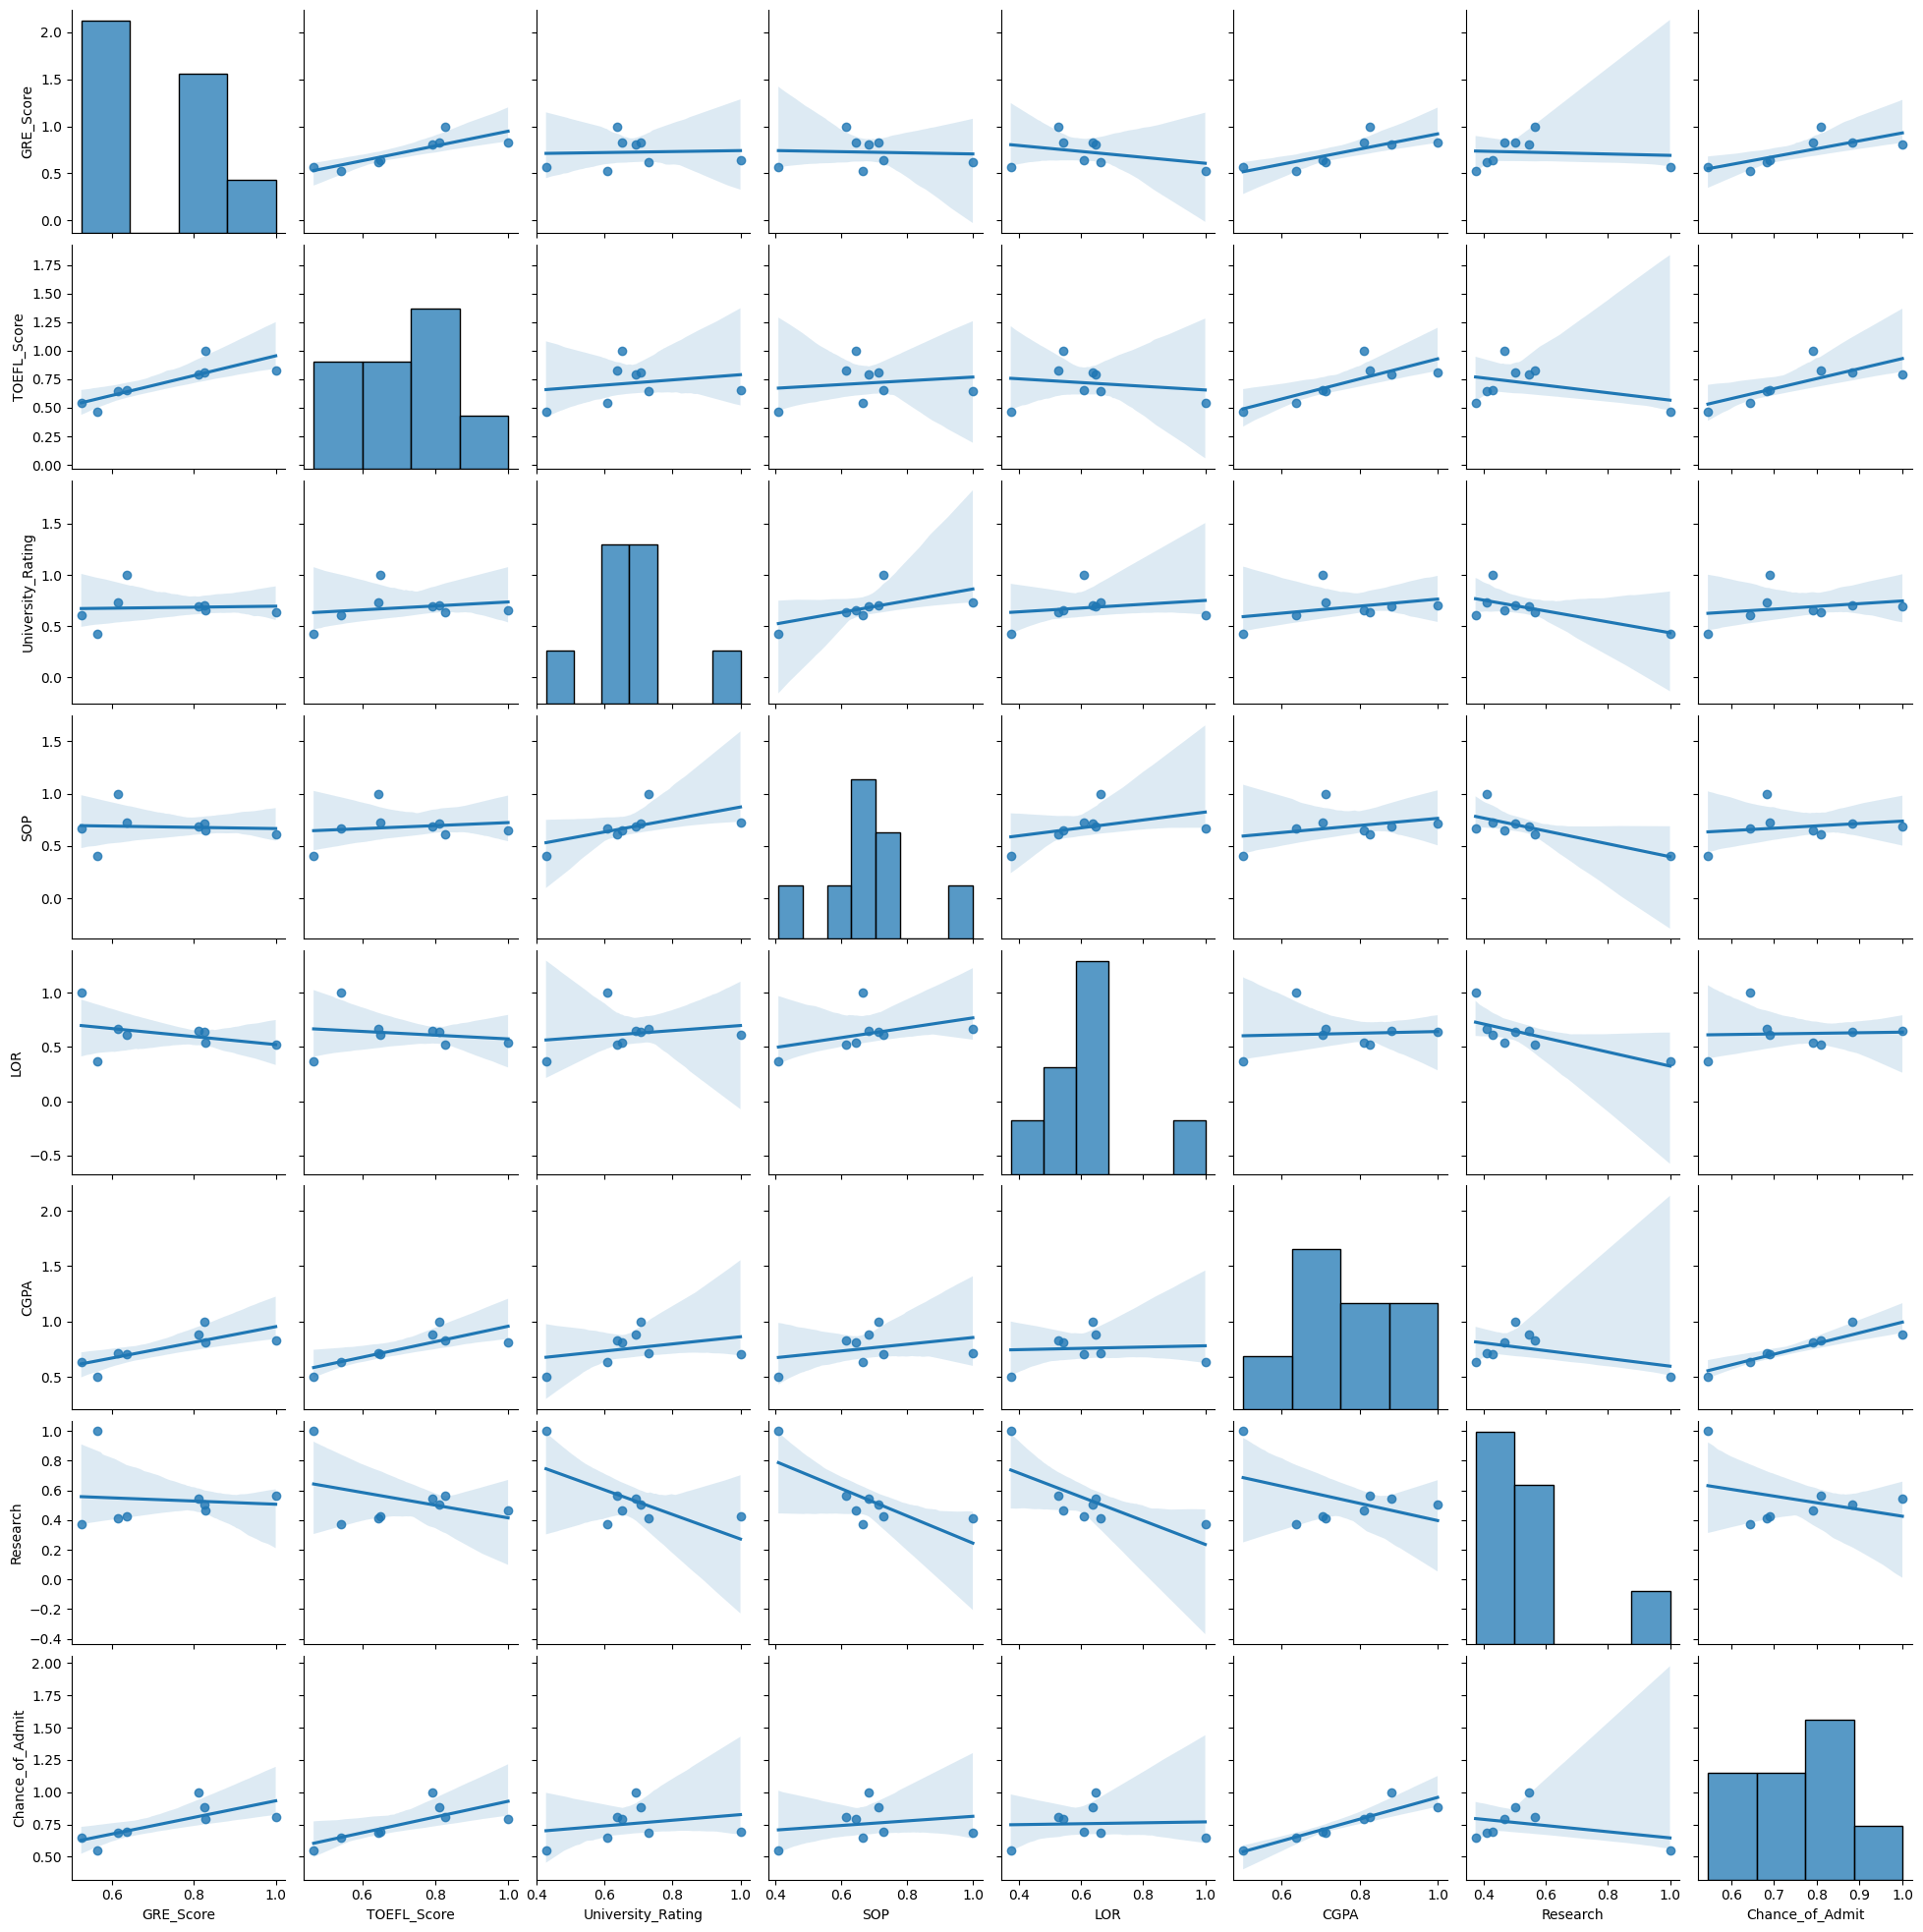

In [ ]:
sns.pairplot(df.corr(),kind='reg')
plt.show()

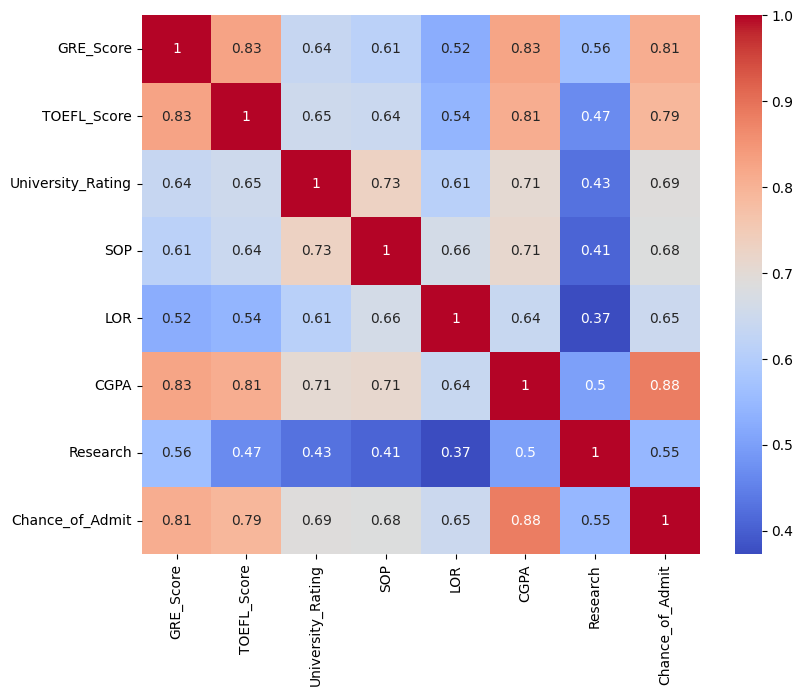

In [ ]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.show()

 - Independent Variables (Input data): GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research

 - Target/Dependent Variable : Chance of Admit (the value we want to predict)

 - From above correlation heatmap , we can observe GRE score TOEFL score and CGPA have very high correlation with Change of admission.

 - University rating, SOP ,LOR and Research are comparatively slightly less correlated than other features.

# **Outliers in the data :**

In [ ]:
def detect_outliers(data):
  length_before = len(data)
  Q1= np.percentile(data,25)
  Q3= np.percentile(data,75)
  IQR= Q3-Q1
  upperbound =Q3+1.5*IQR
  lowerbound =Q3-1.5*IQR
  if lowerbound < 0:
    lowerbound=0
  length_after= len(data[(data>lowerbound)&(data<upperbound)])
  return f"{np.round((length_before-length_after)/length_before,4)} % outliers data from input data found"

In [ ]:
for col in df.columns:
  print(col," : ",detect_outliers(df[col]))

GRE_Score  :  0.082 % outliers data from input data found
TOEFL_Score  :  0.062 % outliers data from input data found
University_Rating  :  0.068 % outliers data from input data found
SOP  :  0.062 % outliers data from input data found
LOR  :  0.216 % outliers data from input data found
CGPA  :  0.08 % outliers data from input data found
Research  :  0.44 % outliers data from input data found
Chance_of_Admit  :  0.106 % outliers data from input data found


In [ ]:
detect_outliers(df)

'0.0 % outliers data from input data found'

# **UNIVARIATE ANALYSIS**

## **Numeric Variables: 'Chance_of_admit', 'GRE_score', 'CGPA', 'TOEFL_score'**

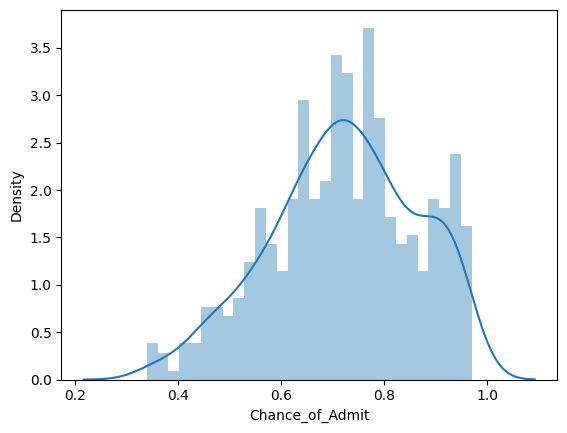

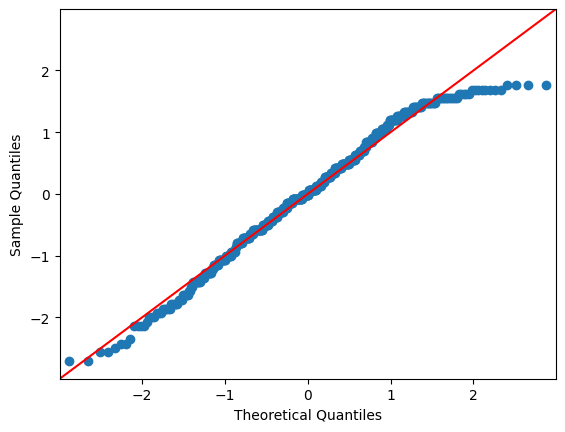

In [ ]:
sns.distplot(df["Chance_of_Admit"], bins=30)
sm.qqplot(df["Chance_of_Admit"],fit=True, line="45")
plt.show()

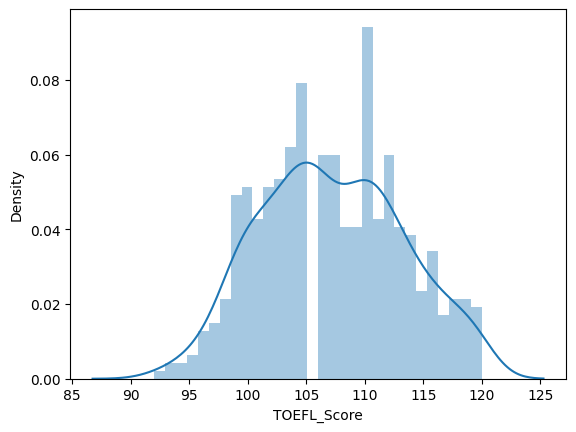

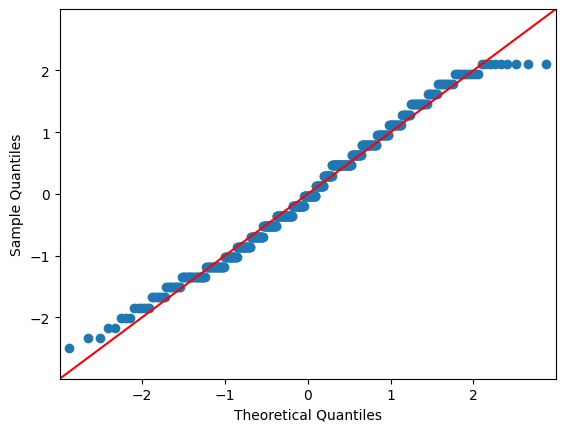

In [ ]:
sns.distplot(df["TOEFL_Score"], bins=30)
sm.qqplot(df["TOEFL_Score"],fit=True, line="45")
plt.show()

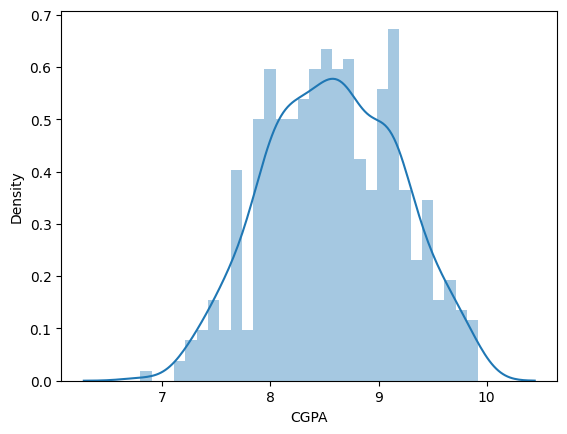

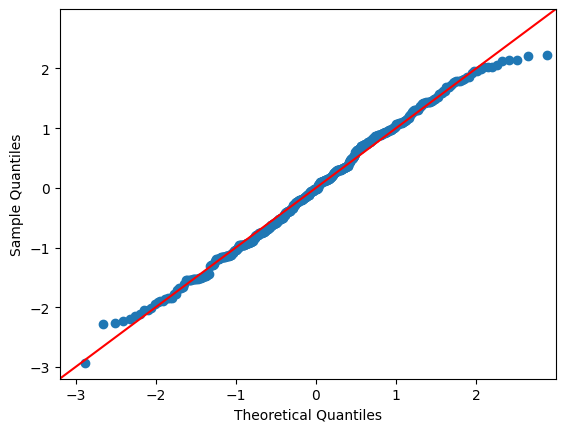

In [ ]:
sns.distplot(df["CGPA"], bins = 30)
sm.qqplot(df["CGPA"],fit=True, line="45")
plt.show()

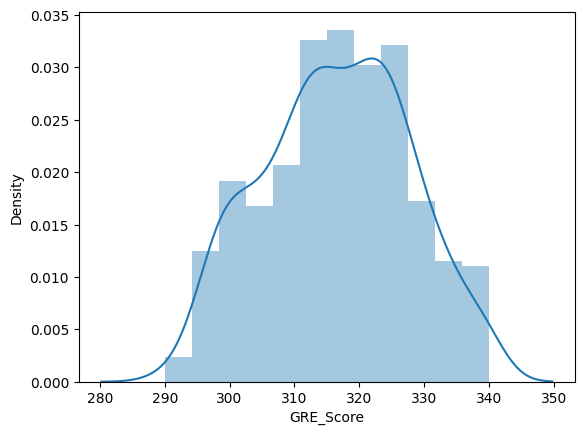

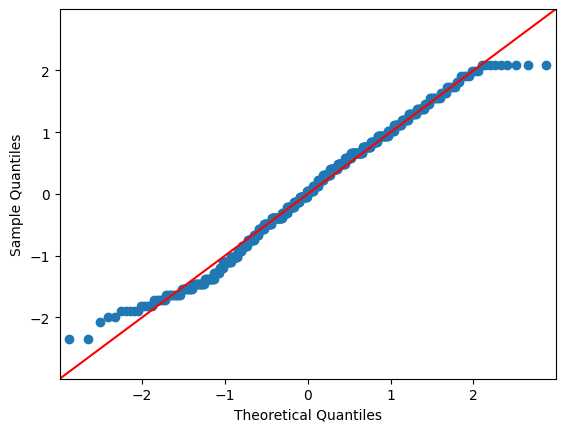

In [ ]:
sns.distplot(df["GRE_Score"])
sm.qqplot(df["GRE_Score"],fit=True, line="45")
plt.show()

 - From the bove distplot & qqplot, normality exists in the features GRE score, TOEFL score & CGPA.

## **Distribution of all other categorical features :**

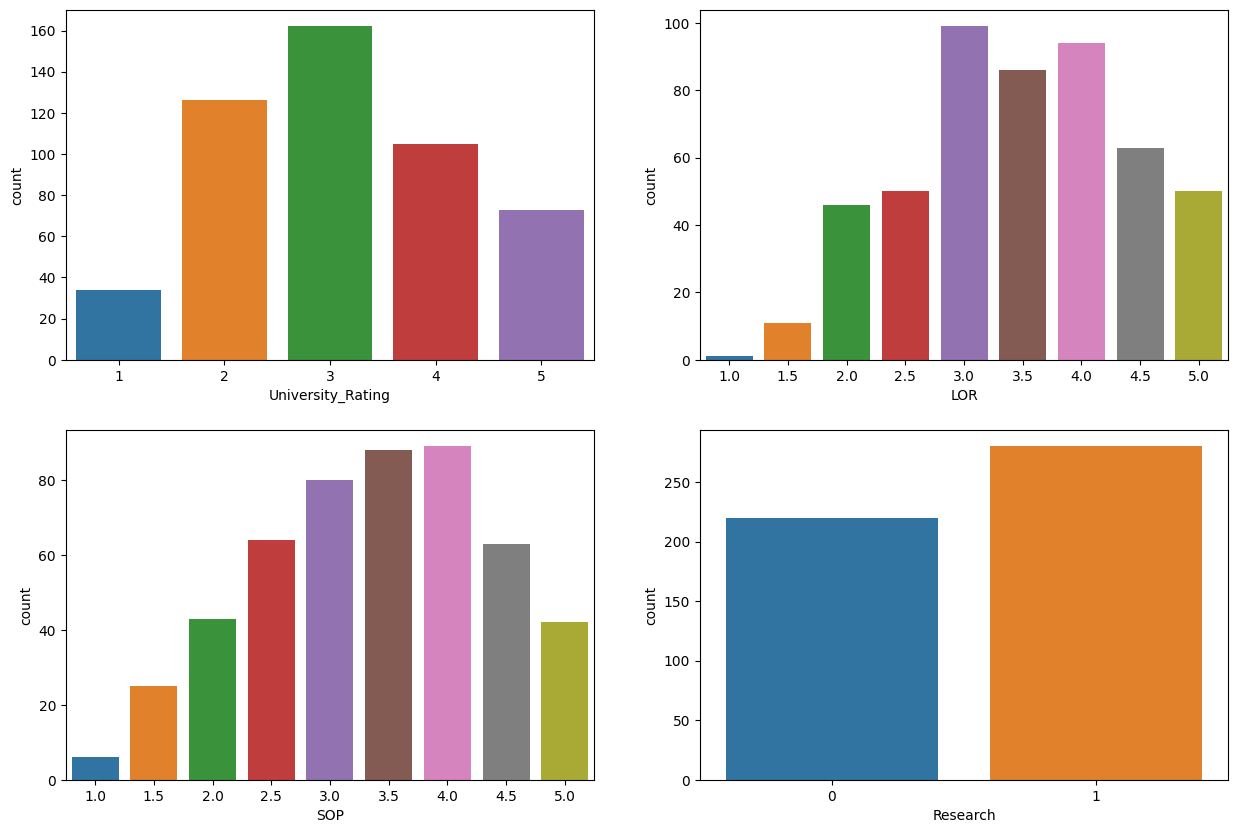

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(data=df, x=df["University_Rating"])
plt.subplot(2,2,2)
sns.countplot(data=df, x=df["LOR"])
plt.subplot(2,2,3)
sns.countplot(data=df, x=df["SOP"])
plt.subplot(2,2,4)
sns.countplot(data=df, x=df["Research"])
plt.show()

## **BIVARIATE OR MULTIVARIATE ANALYSIS:**

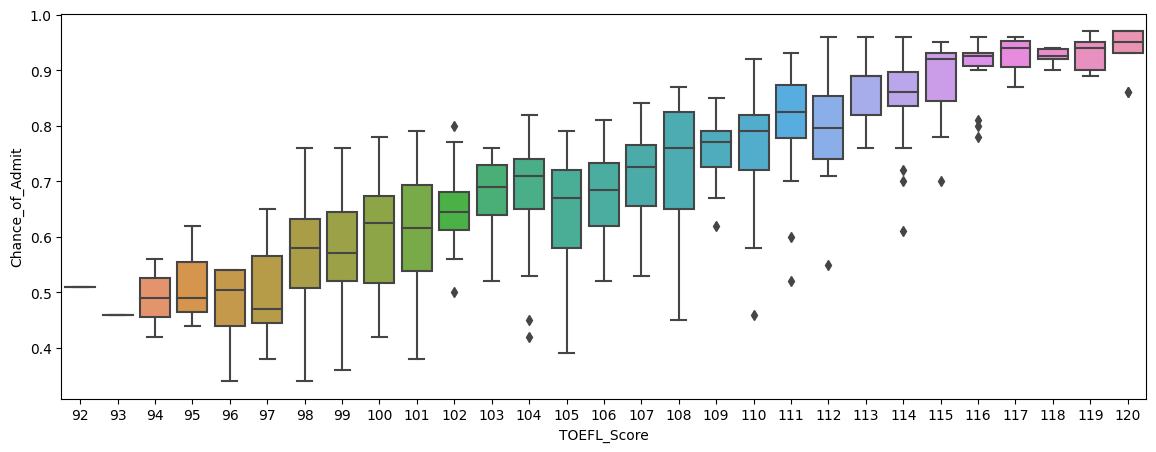

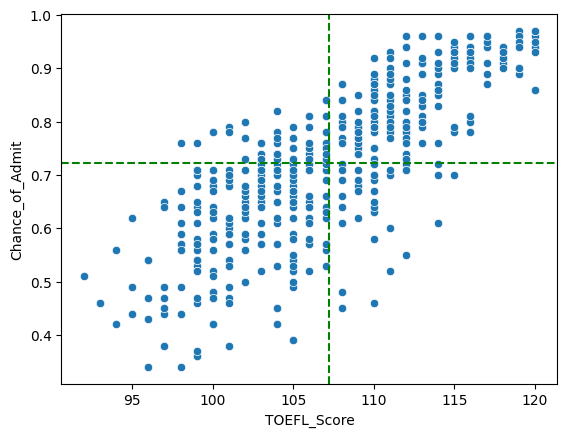

In [ ]:
plt.figure(figsize=(14,5))
sns.boxplot(y = df["Chance_of_Admit"], x = df["TOEFL_Score"])
plt.show()
sns.scatterplot(y = df["Chance_of_Admit"], x = df["TOEFL_Score"])
plt.axvline(df["TOEFL_Score"].mean(),color="green",linestyle="--")
plt.axhline(df['Chance_of_Admit'].mean(),color="green",linestyle="--")
plt.show()

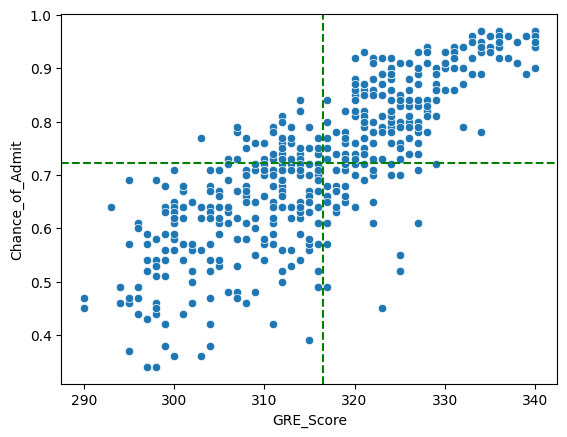

In [ ]:
sns.scatterplot(y = df["Chance_of_Admit"], x = df["GRE_Score"])
plt.axvline(df["GRE_Score"].mean(),color="green",linestyle="--")
plt.axhline(df["Chance_of_Admit"].mean(),color="green",linestyle="--")
plt.show()

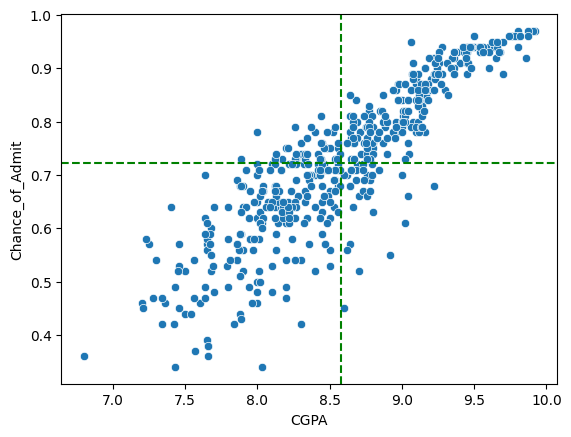

In [ ]:
sns.scatterplot(y = df["Chance_of_Admit"], x = df["CGPA"])
plt.axvline(df["CGPA"].mean(),color="green",linestyle="--")
plt.axhline(df["Chance_of_Admit"].mean(),color="green",linestyle="--")
plt.show()

 - From the above plots, there seems to have positive correlation among Chance of Admit vs (GRE_score, TOEFL_score, CGPA)

## **Categorical features - vs - chances of admission boxplot:**

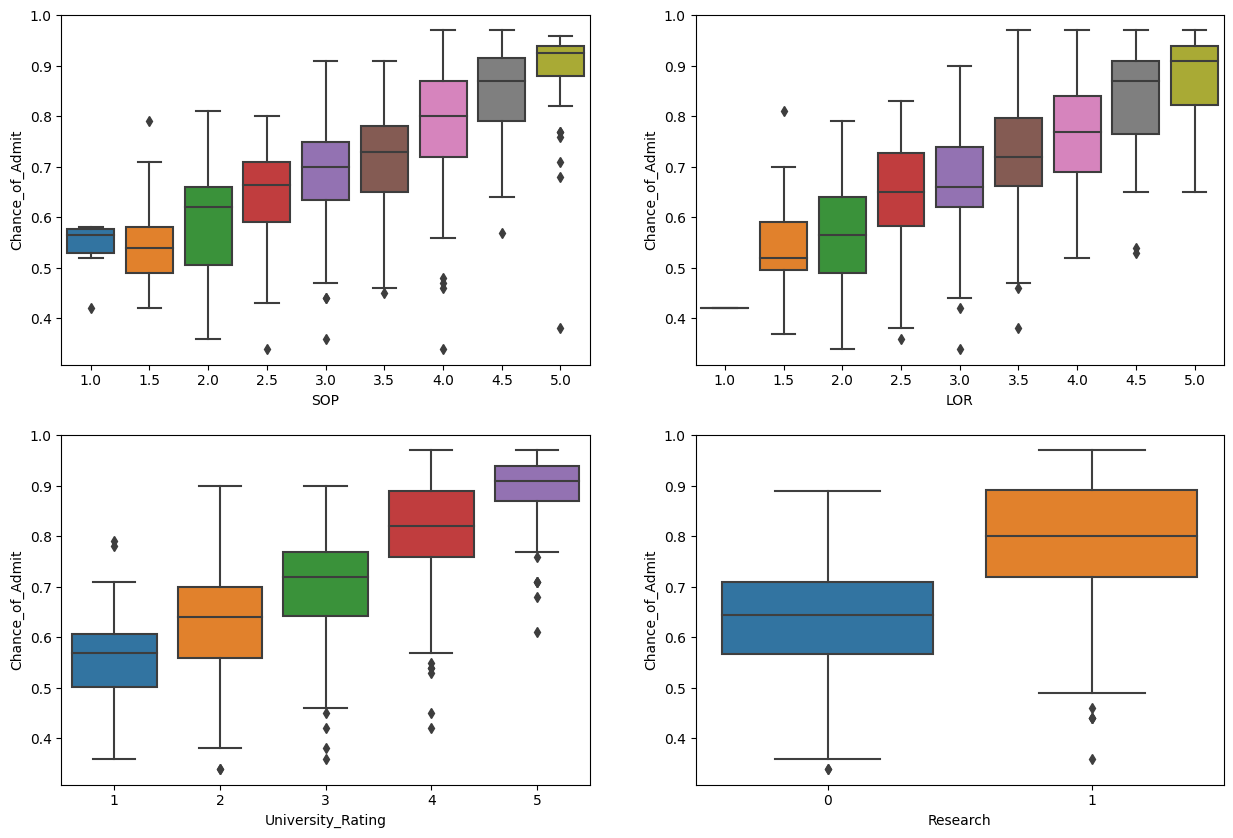

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(y = df["Chance_of_Admit"], x = df["SOP"])
plt.subplot(2,2,2)
sns.boxplot(y = df["Chance_of_Admit"], x = df["LOR"])
plt.subplot(2,2,3)
sns.boxplot(y = df["Chance_of_Admit"], x = df["University_Rating"])
plt.subplot(2,2,4)
sns.boxplot(y = df["Chance_of_Admit"], x = df["Research"])
plt.show()

 - From the above plots, Chance of Admit has positive correlation with ordinal categorical variables.

### **People with higher GRE Scores also have higher TOEFL Scores.**


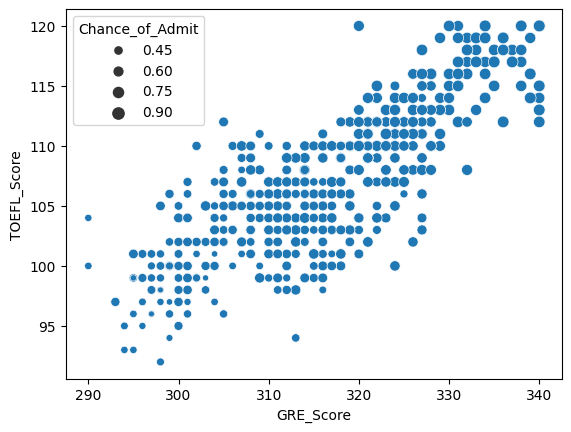

In [ ]:
sns.scatterplot(x=df['GRE_Score'],y=df['TOEFL_Score'],size=df['Chance_of_Admit'])
plt.show()

 - Positive correlation exist between GRE_score & TOEFL_score.

### **A student with a higher CGPA has a good LOR.**

<Axes: xlabel='LOR', ylabel='CGPA'>

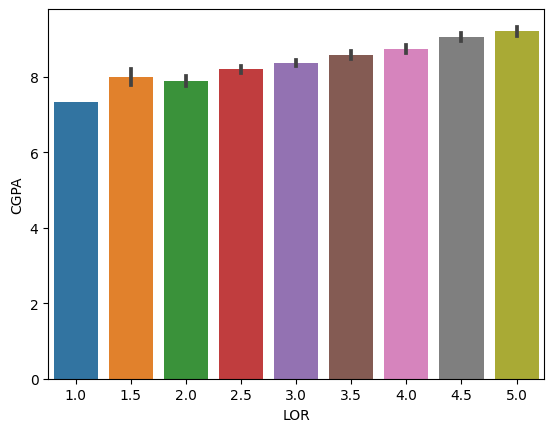

In [ ]:
sns.barplot(data=df,x=df['LOR'],y=df['CGPA'])

 - Higher CGPA has a excellent LOR.

### **Research experience for sure increases a student’s..**
 - Chance of Admit
 - LOR
 - University Rating

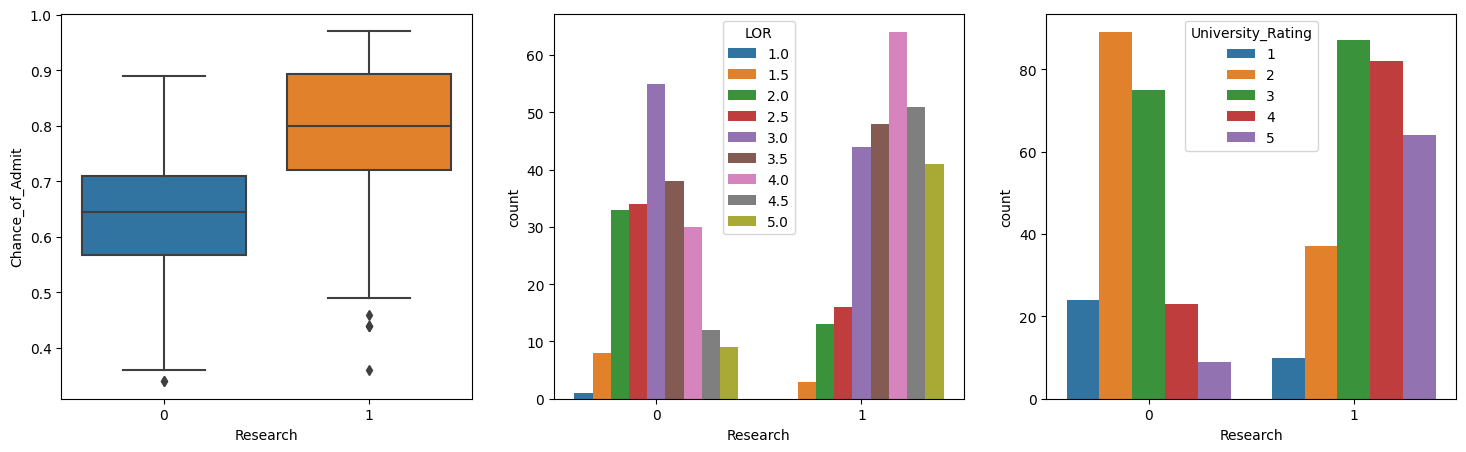

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.boxplot(data=df, x=df['Research'],y=df['Chance_of_Admit'])
plt.subplot(1,3,2)
sns.countplot(data=df, x=df['Research'],hue=df['LOR'])
plt.subplot(1,3,3)
sns.countplot(data=df, x=df['Research'],hue=df['University_Rating'])
plt.show()

 - Above plot proves research experience for sure increases a student’s a Chance of Admit but for LOR and university rating it seems equal on both aspects.

## **Correlation among independent variables**

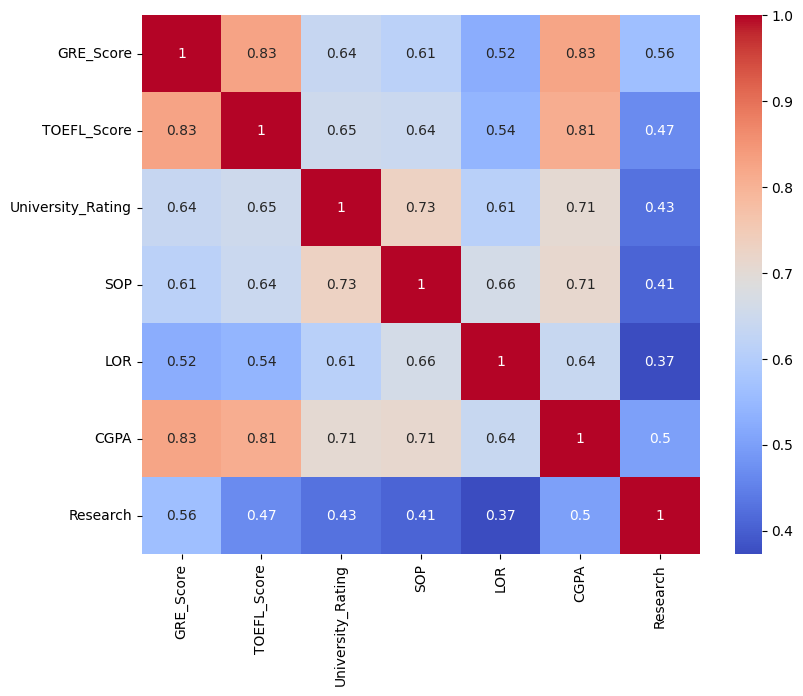

In [ ]:
independent_variables = df.drop(['Chance_of_Admit'],axis=1)
plt.figure(figsize=(9,7))
sns.heatmap(independent_variables.corr(),annot=True, cmap='coolwarm')
plt.show()

 - Strong Linearity exists between CGPA, GRE score & TOEFL score.
 - Medium Linearity exists between CGPA, university rating, SOP.
 - Low Linearity between other variables.

# **Linear Regression Model from (Statsmodel library)**

In [ ]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error, adjusted_mutual_info_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.diagnostic import het_goldfeldquandt
from scipy import stats

In [ ]:
y=df[['Chance_of_Admit']]
X=df.drop('Chance_of_Admit', axis=1)

In [ ]:
standardizer = StandardScaler()
standardizer.fit(X)
x = standardizer.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
y_train = np.array(y_train)

In [ ]:
X_train_df = pd.DataFrame(X_train, columns=['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP','LOR','CGPA','Research' ])
X_sm = sm.add_constant(X_train_df, prepend=True, has_constant='add') # Statmodels default is without intercept, to add intercept we need to add constant.
model = sm.OLS(y_train, X_sm)
results = model.fit()
# Print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.7
Date:                Wed, 06 Dec 2023   Prob (F-statistic):          2.10e-142
Time:                        17:13:42   Log-Likelihood:                 559.27
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     392   BIC:                            -1071.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7229      0.00

In [ ]:
predictions=results.predict(X_sm)
predictions

0      0.661064
1      0.723740
2      0.566116
3      0.432643
4      0.769513
         ...   
395    0.701177
396    0.892280
397    0.807326
398    0.859837
399    0.542491
Length: 400, dtype: float64

In [ ]:
mae = mean_absolute_error(y_train, predictions)
mse = mean_squared_error(y_train, predictions)
rmse = mean_squared_error(y_train, predictions, squared=False)

In [ ]:
print(f"R-squared: {results.rsquared}")
print(f"Adj. R-squared: {results.rsquared_adj}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared: 0.8215099192361265
Adj. R-squared: 0.8183225963653431
Mean Absolute Error (MAE): 0.04294488315548088
Mean Squared Error (MSE): 0.0035733525638779674
Root Mean Squared Error (RMSE): 0.05977752557506849


## **Multicollinearity check by VIF score**



In [ ]:
X_t=pd.DataFrame(X_train_df, columns=X_train_df.columns)
vif=pd.DataFrame()
vif['Features']=X_t.columns
vif['VIF']=[variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,GRE_Score,4.87
5,CGPA,4.75
1,TOEFL_Score,4.24
3,SOP,2.92
2,University_Rating,2.80
4,LOR,2.08
6,Research,1.51


### **VIF score are all below 5 , doesnt seem to have very high multicolinearity.**

## **Normality of residuals**



In [ ]:
X_sm=sm.add_constant(X_train_df)
sm_model=sm.OLS(y_train, X_sm).fit()

In [ ]:
Y_hat=sm_model.predict(X_sm)
errors = Y_hat - y_train.flatten()

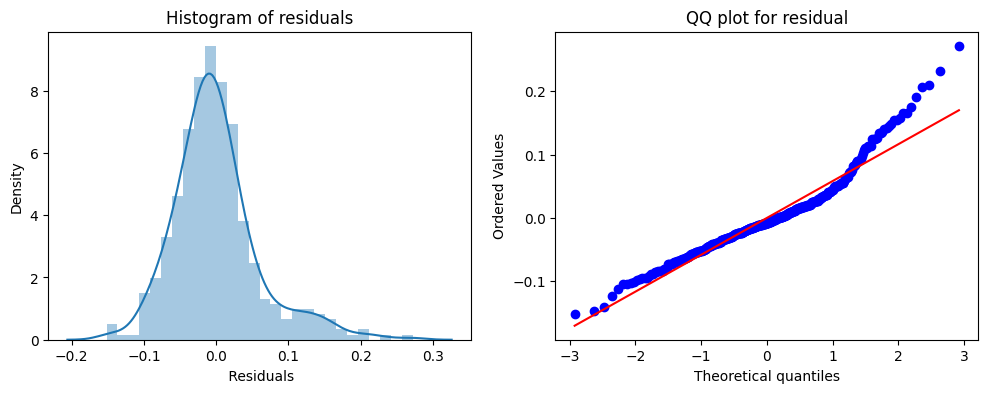

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")
plt.subplot(1,2,2)
stats.probplot(errors, plot = plt)
plt.title('QQ plot for residual')
plt.show()

In [ ]:
res = stats.shapiro(errors)
res.statistic

0.9360625743865967

### **Closer the value to 1, more is the normality.**

## **Test for Homoscedasticity**


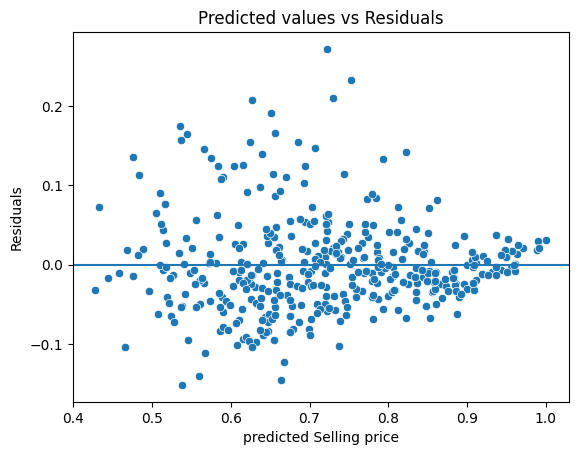

In [ ]:
sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.axhline(y=0)
plt.title("Predicted values vs Residuals")
plt.show()

### **Goldfeld-Quandt test for homoscedasticity.**

In [ ]:
residuals = results.resid
exog_vars = X_sm.values
test_result = het_goldfeldquandt(residuals, exog_vars)
F_statistic = test_result[0]
p_value = test_result[1]
print(f'F-statistic for Goldfeld-Quandt test: {F_statistic}')
print(f'p-value for Goldfeld-Quandt test: {p_value}')
if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence of heteroscedasticity.")
else:
    print("Do not reject the null hypothesis. No evidence of heteroscedasticity.")

F-statistic for Goldfeld-Quandt test: 0.9371472699603601
p-value for Goldfeld-Quandt test: 0.673326946550699
Do not reject the null hypothesis. No evidence of heteroscedasticity.


## **The mean of residuals is nearly zero.**


In [ ]:
residuals_mean = np.mean(errors)
print(f"Mean of Residuals: {residuals_mean}")
print("OLS model has an unbiased average prediction.")

Mean of Residuals: 2.0983215165415458e-16
OLS model has an unbiased average prediction.


## **Linearity of variables**

GRE_Score


<Figure size 200x200 with 0 Axes>

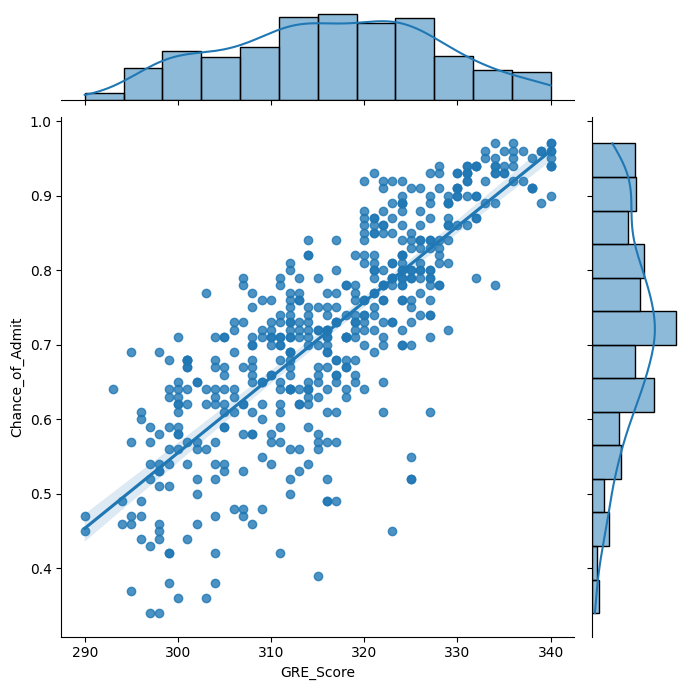

TOEFL_Score


<Figure size 200x200 with 0 Axes>

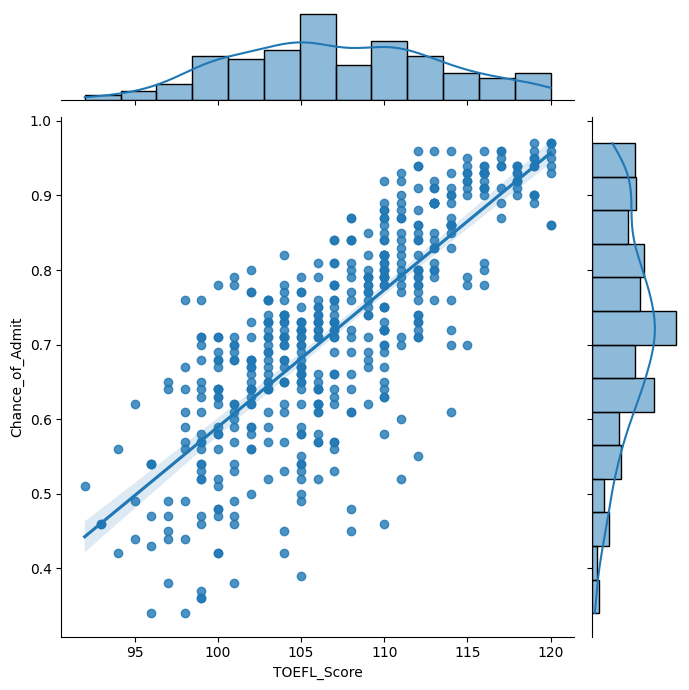

University_Rating


<Figure size 200x200 with 0 Axes>

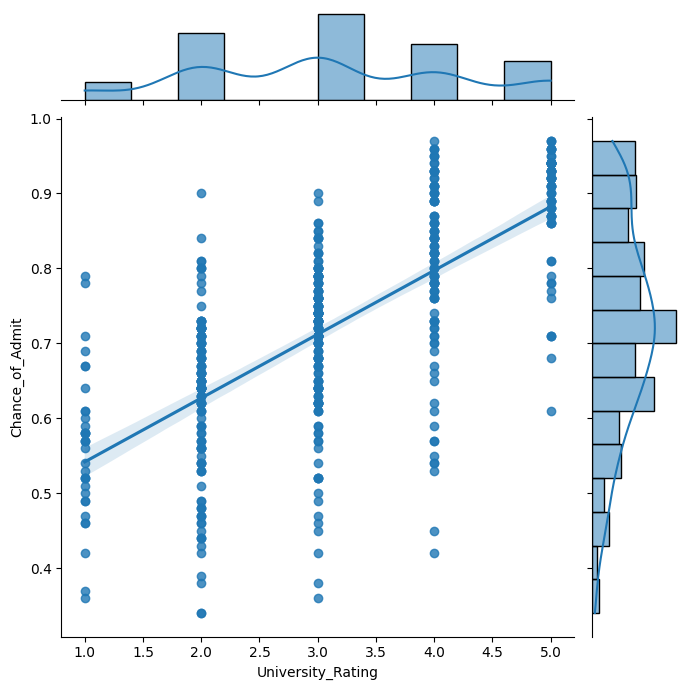

SOP


<Figure size 200x200 with 0 Axes>

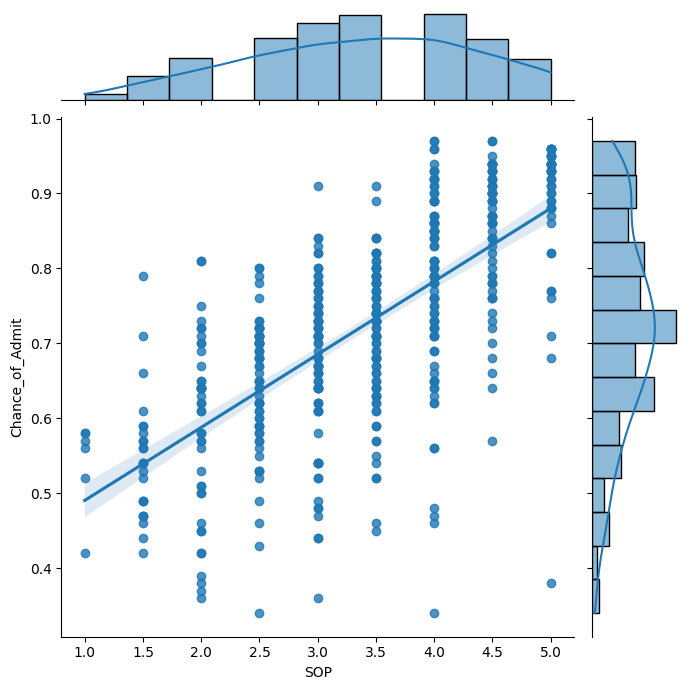

LOR


<Figure size 200x200 with 0 Axes>

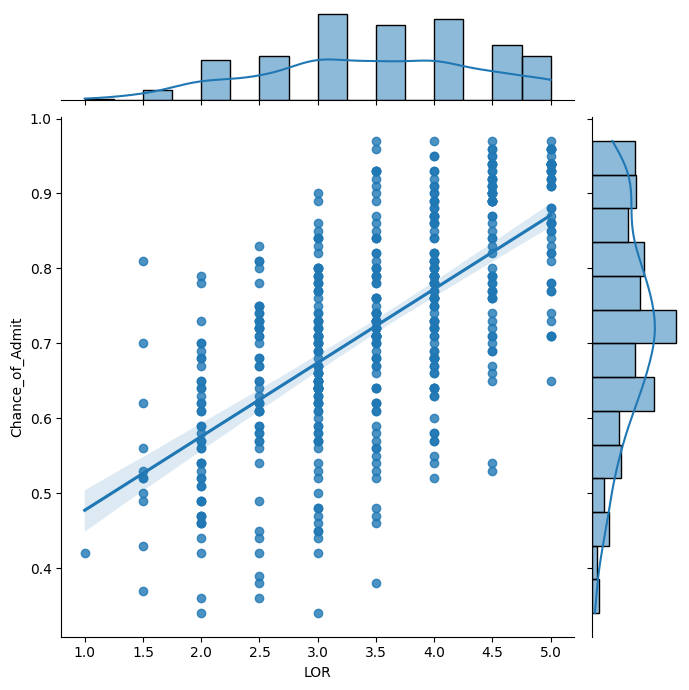

CGPA


<Figure size 200x200 with 0 Axes>

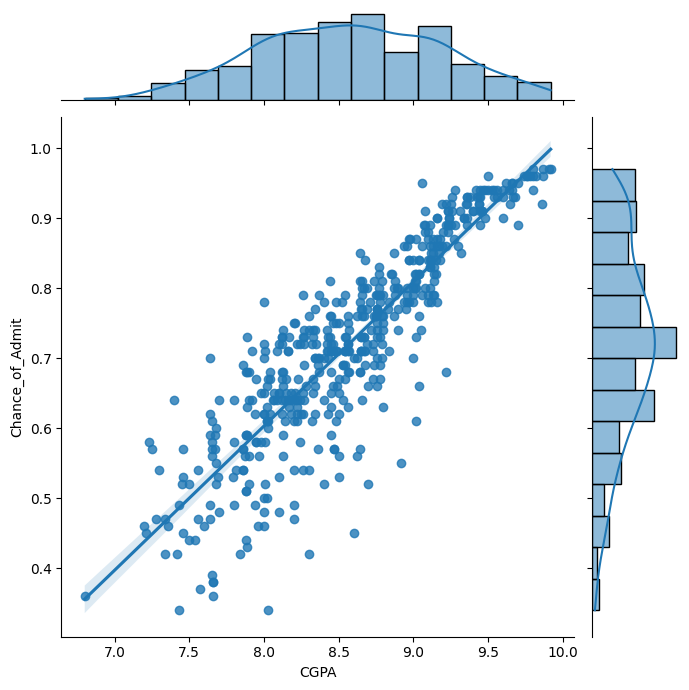

Research


<Figure size 200x200 with 0 Axes>

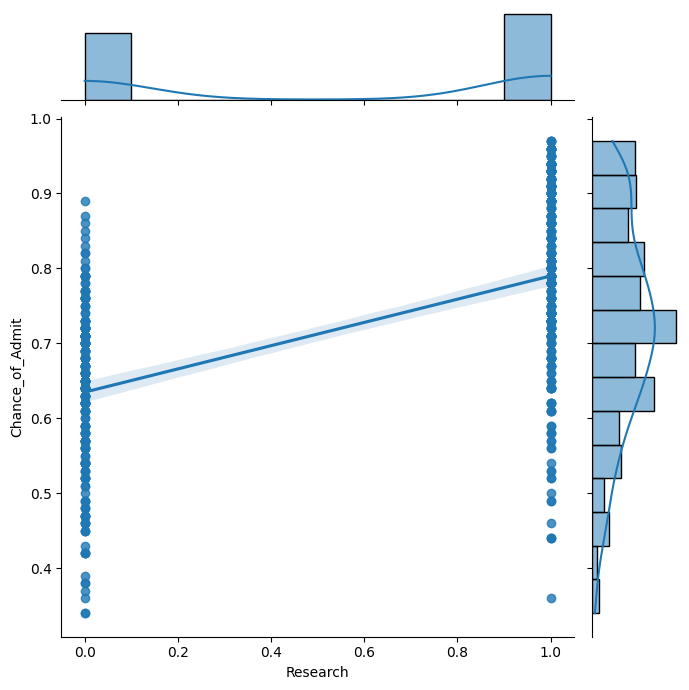

In [ ]:
for col in df.columns[:-1]:
    print(col)
    plt.figure(figsize=(2,2))
    sns.jointplot(x=df[col], y=df['Chance_of_Admit'], data=df, kind='reg', height=7)
    plt.show()

 - Linearity of independent variables with dependant variables exists with the target variable 'Chance of Admit'

# **Model Regularisation :**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

## **L2 regularization : Ridge regression**

In [ ]:
def AdjustedR2score(R2,n,d):
    return 1-(((1-R2)*(n-1))/(n-d-1))

In [ ]:
train_R2_score = []
test_R2_score = []
lambdas = []
train_test_difference_Of_R2 =  []
lambda_ = 0
while lambda_ <= 5:
    lambdas.append(lambda_)
    RidgeModel = Ridge(lambda_)
    RidgeModel.fit(X_train,y_train)
    trainR2 = RidgeModel.score(X_train,y_train)
    testR2 = RidgeModel.score(X_test,y_test)
    train_R2_score.append(trainR2)
    test_R2_score.append(testR2)

    lambda_ += 0.01

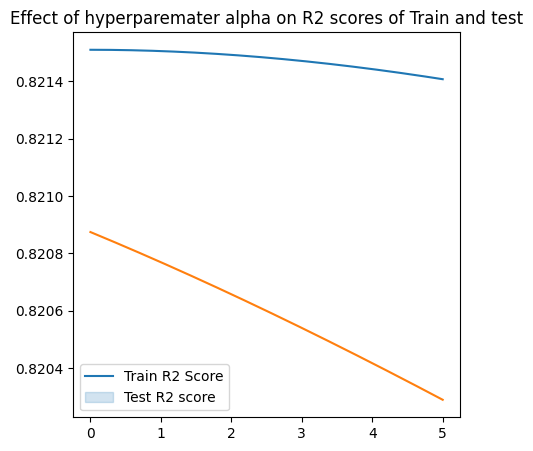

In [ ]:
plt.figure(figsize = (5,5))
sns.lineplot(x=lambdas,y=train_R2_score)
sns.lineplot(x=lambdas,y=test_R2_score)
plt.legend(['Train R2 Score','Test R2 score'])
plt.title("Effect of hyperparemater alpha on R2 scores of Train and test")
plt.show()

In [ ]:
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(X_train,y_train)
trainR2 = RidgeModel.score(X_train,y_train)
testR2 = RidgeModel.score(X_test,y_test)

In [ ]:
trainR2,testR2

(0.8215098726041208, 0.8208639536156423)

In [ ]:
RidgeModel_coefs = pd.DataFrame(RidgeModel.coef_.reshape(1,-1),columns=df.columns[:-1])
RidgeModel_coefs["Intercept"] = RidgeModel.intercept_
RidgeModel_coefs

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020695,0.019296,0.00701,0.00299,0.013342,0.070449,0.009875,0.722882


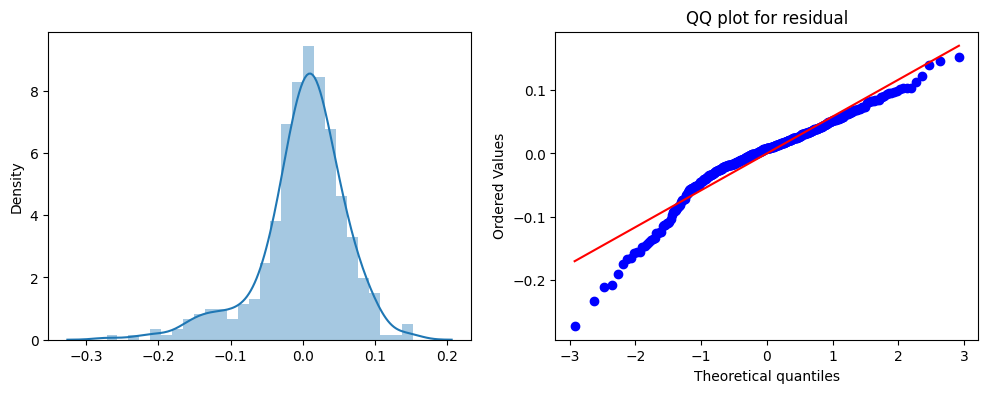

In [ ]:
y_predicted = RidgeModel.predict(X_train)
residuals = (y_train - y_predicted)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(residuals)
plt.subplot(1,2,2)
stats.probplot(residuals.reshape(-1,), plot = plt)
plt.title('QQ plot for residual')
plt.show()

In [ ]:
y_pred = RidgeModel.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("r2_score:",r2_score(y_test,y_pred)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1]))  # adjusted R2 score

MSE: 0.00345929619172833
RMSE: 0.05881578182535985
MAE : 0.04020305511705695
r2_score: 0.8208639536156423
Adjusted R2 score : 0.818315270028873


## **L1 regularization : Lasso**

In [ ]:
train_R2_score = []
test_R2_score = []
lambdas = []
train_test_difference_Of_R2 =  []
lambda_ = 0
while lambda_ <= 5:
    lambdas.append(lambda_)
    LassoModel = Lasso(alpha=lambda_)
    LassoModel.fit(X_train , y_train)
    trainR2 = LassoModel.score(X_train,y_train)
    testR2 = LassoModel.score(X_test,y_test)
    train_R2_score.append(trainR2)
    test_R2_score.append(testR2)

    lambda_ += 0.001

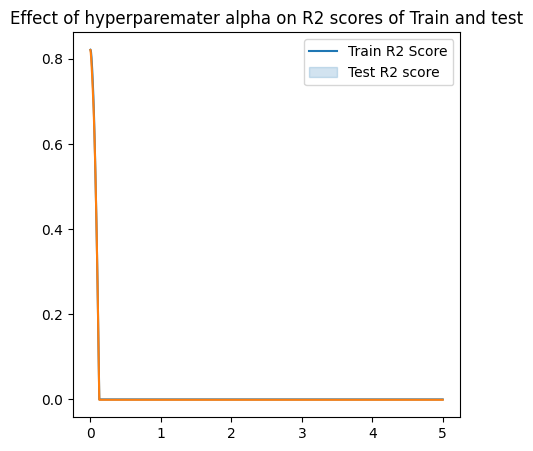

In [ ]:
plt.figure(figsize = (5,5))
sns.lineplot(x=lambdas,y=train_R2_score,)
sns.lineplot(x=lambdas, y=test_R2_score)
plt.legend(['Train R2 Score','Test R2 score'])
plt.title("Effect of hyperparemater alpha on R2 scores of Train and test")
plt.show()

In [ ]:
LassoModel = Lasso(alpha=0.001)
LassoModel.fit(X_train , y_train)
trainR2 = LassoModel.score(X_train,y_train)
testR2 = LassoModel.score(X_test,y_test)

In [ ]:
Lasso_Model_coefs = pd.DataFrame(LassoModel.coef_.reshape(1,-1),columns=df.columns[:-1])
Lasso_Model_coefs["Intercept"] = LassoModel.intercept_
Lasso_Model_coefs

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020616,0.019069,0.006782,0.002808,0.012903,0.070605,0.009278,0.722863


In [ ]:
trainR2,testR2

(0.82142983289567, 0.8198472607571161)

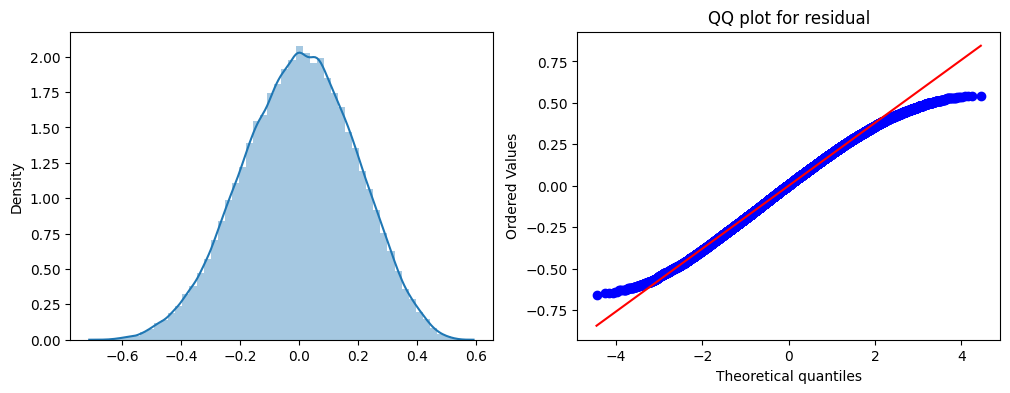

In [ ]:
y_predicted = LassoModel.predict(X_train)
residuals = (y_train - y_predicted)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(residuals)
plt.subplot(1,2,2)
stats.probplot(residuals.reshape(-1,), plot = plt)
plt.title('QQ plot for residual')
plt.show()

In [ ]:
y_pred = LassoModel.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("r2_score:",r2_score(y_test,y_pred)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1]))  # adjusted R2 score

MSE: 0.0034789295475193297
RMSE: 0.058982451182697807
MAE : 0.04022896061335951
r2_score: 0.8198472607571161
Adjusted R2 score : 0.8172841120280507


In [ ]:
y_pred = RidgeModel.predict(X_test)
RidgeModel_model_metrics = []
RidgeModel_model_metrics.append(mean_squared_error(y_test,y_pred)) # MSE
RidgeModel_model_metrics.append(np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
RidgeModel_model_metrics.append(mean_absolute_error(y_test,y_pred) ) # MAE
RidgeModel_model_metrics.append(r2_score(y_test,y_pred)) # r2score
RidgeModel_model_metrics.append(AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1]))

In [ ]:
y_pred = LassoModel.predict(X_test)
LassoModel_model_metrics = []
LassoModel_model_metrics.append(mean_squared_error(y_test,y_pred)) # MSE
LassoModel_model_metrics.append(np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
LassoModel_model_metrics.append(mean_absolute_error(y_test,y_pred) ) # MAE
LassoModel_model_metrics.append(r2_score(y_test,y_pred)) # r2score
LassoModel_model_metrics.append(AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1]))

In [ ]:
X_test = sm.add_constant(X_test)  # Add a constant term for the intercept
y_pred = results.predict(X_test)
ols_model_metrics = []
ols_model_metrics.append(mean_squared_error(y_test, y_pred))  # MSE
ols_model_metrics.append(np.sqrt(mean_squared_error(y_test, y_pred)))  # RMSE
ols_model_metrics.append(mean_absolute_error(y_test, y_pred))  # MAE
ols_model_metrics.append(r2_score(y_test, y_pred))  # R-squared
ols_model_metrics.append(AdjustedR2score(r2_score(y_test, y_pred) ,len(X),X.shape[1]))

In [ ]:
A = pd.DataFrame([ols_model_metrics,LassoModel_model_metrics,RidgeModel_model_metrics],columns=["MSE","RMSE","MAE","R2_SCORE","ADJUSTED_R2"],index = ["Statsmodel_OLS","Lasso Regression Model","Ridge Regression Model"])
A

,MSE,RMSE,MAE,R2_SCORE,ADJUSTED_R2
Statsmodel_OLS,0.003459,0.058814,0.040200,0.820874,0.818326
Lasso Regression Model,0.003479,0.058982,0.040229,0.819847,0.817284
Ridge Regression Model,0.003459,0.058816,0.040203,0.820864,0.818315


In [ ]:
ols_params = results.params.squeeze()
lasso_coefs = Lasso_Model_coefs.squeeze()
ridge_coefs = RidgeModel_coefs.squeeze()

# Create a DataFrame with the coefficients
B = pd.DataFrame({
    'Statsmodel_OLS': ols_params,
    'Lasso Regression Model': lasso_coefs,
    'Ridge Regression Model': ridge_coefs
})
B.loc['Intercept', 'Statsmodel_OLS'] = results.params['const']
B = B.iloc[:-1, :]
B = B.transpose()
B

,CGPA,GRE_Score,Intercept,LOR,Research,SOP,TOEFL_Score,University_Rating
Statsmodel_OLS,0.070514,0.020675,0.722881,0.013338,0.009873,0.002975,0.019284,0.007001
Lasso Regression Model,0.070605,0.020616,0.722863,0.012903,0.009278,0.002808,0.019069,0.006782
Ridge Regression Model,0.070449,0.020695,0.722882,0.013342,0.009875,0.002990,0.019296,0.007010


In [ ]:
REPORT = B.reset_index().merge(A.reset_index())
REPORT

,index,CGPA,GRE_Score,Intercept,LOR,Research,SOP,TOEFL_Score,University_Rating,MSE,RMSE,MAE,R2_SCORE,ADJUSTED_R2
0,Statsmodel_OLS,0.070514,0.020675,0.722881,0.013338,0.009873,0.002975,0.019284,0.007001,0.003459,0.058814,0.040200,0.820874,0.818326
1,Lasso Regression Model,0.070605,0.020616,0.722863,0.012903,0.009278,0.002808,0.019069,0.006782,0.003479,0.058982,0.040229,0.819847,0.817284
2,Ridge Regression Model,0.070449,0.020695,0.722882,0.013342,0.009875,0.002990,0.019296,0.007010,0.003459,0.058816,0.040203,0.820864,0.818315


# **Insights and Recommendations :**
 - University Rating , SOP and LOR strength and research are seems to be discrete random Variables , but also ordinal numeric data.

 - All the other features are numeric, ordinal and continuous.

 - No null values were present in data.

 - No Significant amount of outliers were found in data.

 - Chance of admission(target variable) and GRE score(an independent feature) are nearly normally distrubted.

 - Independent Variables (Input data): GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research

 - Target/Dependent Variable : Chance of Admit (the value we want to predict)

 - From correlation heatmap , we can observe GRE score, TOEFL score and CGPA have very high correlation with Change of admission.

 - University rating, SOP ,LOR and Research have comparatively slightly less correlated than other features.

 - Chances of Admit is a probability measure , which is within 0 to 1 which is good (no outliers or missleading data in column).

 - Range of GRE score looks like between 290 to 340.

 - Range of TOEFL score is between 92 to 120.

 - University rating , SOP and LOR are distributed between range of 1 to 5.

 - CGPA range is between 6.8 to 9.92.

 - From boxplots (distribution of chance of admission (probability of getting admition) as per GRE score ) : with higher GRE score , there is high probability of getting an admission .

 - Students having high TOEFL score , has higher probability of getting admition .

 - From count plots, we can observe , statement of purpose SOP strength is positively correlated with Chance of Admission .

 - We can also similar pattern in Letter of Recommendation Stength and University rating , have positive correlation with Chance of Admission .

 - Student having research has higher chances of Admission , but also we can observe some outliers within that caregory.



# **Recommendations :**
 - Education institute can not just help student to improve their CGPA score but also assist them writing good LOR and SOP thus helping them admit to better university.
 - The education institute can not just help student to improve their GRE Score but can also assist them writing good LOR and SOP thus helping them admit to a better University.
 - Awareness of CGPA and Reserach Capabilities : Seminars can be organised to increase the awareness regarding CGPA and Research Capablities to enhance the chance of admit.
 - Any student can never change their current state of attributes so awareness and marketing campaign need to surveyed hence creating a first impression on student at undergraduate level, which wont just increase company's popularity but will also help sudent get prepared for future plans in advance.
 - A dashboard can be created for students whenever they loged in into your website, hence allowing a healthy competition also to create a progress report for students.
 - Additional features like number of hours they put in studing, watching lectures, assignments soved percentage, marks in mock test can result a better report for every student to judge themselves and improve on their own.


# **Regression Analysis :**
 - From regression analysis (above bar chart and REPORT file), we can observe the CGPA is the most Important feature for predicting the chances of admission.

 - Other important features are GRE and TOEFL score .

 - After first Regression Model, checked for Multicolinearity . Getting all the VIF scores below 5 , showing there's no high multicolinearity.

 - All the residuals are normally distributed and the same has been confirm with the help of Goldfeld-Quandt test for homoscedasticity.

 - Regularised model ridge and lasso both give very similar results to statsmodel_OLS.